## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [3]:
## Creating a grid with 50 rows and 50 columns with a spacing of one 
ny = 50
nx = 50
dx = 1 
dy = 1

## Initial conditions 
T = np.zeros((ny,nx))
T[0,:] = 300.
T[-1,:] = 800.

## Defining thermal conductivity, starting time and ending time 
k = 1.0 
starting_time = 0 
ending_time = 15000

time = 0.0

## Creating a for loop and an if statement - this will allow for the iteration until the solution
## reaches a steady state 
for i in range (starting_time,ending_time): 
    
    T_store = T.copy()
    gradTx, gradTy = np.gradient(T, dx, dy) ## Derivative of time in each direction 
    flux_x = k*gradTx ## Gradient x diffusivity
    flux_y = k*gradTy
    
## Second derivative 
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k ## Timestep size 
    time = time + dt

    T_new = T + dt*divT
    
    T = T_new

## Creating an if statement to break the loop when the difference between the previous 
## value and the most recent output is less than 0.001 - close to steady state
    if np.all(np.abs(T-T_store)<0.001): 
        break 

In [4]:
## Determine after how many timesteps the for loop goes through before reaching the if statement requirements 
print(i)

10176


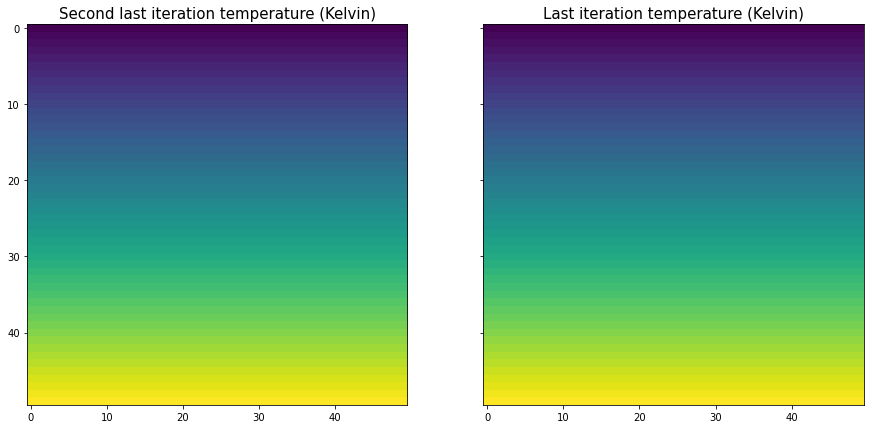

In [5]:
## Visualisation of the gradient of the second last iteration (left) and second last iteration (right) 
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,12))
ax1.imshow(T)
ax1.set_title('Second last iteration temperature (Kelvin)', fontsize = 15)
ax2.imshow(T_new)
ax2.set_title('Last iteration temperature (Kelvin)', fontsize = 15)

pass

In [6]:
## From the above exercise, we explore the temperature gradient of a solution thorugh an area. 
## The two plots above have confirmed that the temperature flow has reached a steady state. This 
## has been reached after 10176 timesteps and has been calculated through the for loop created. 

## We will now test the same process but change the timestep. With this we can find a maximum value 
## of the timestep before it creates an instability in the code.

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

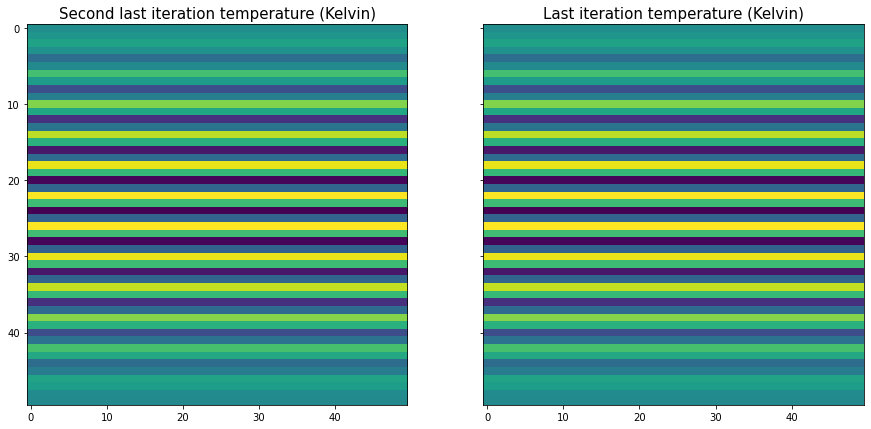

In [24]:
## Creating a grid with 50 rows and 50 columns with a spacing of one 
ny = 50
nx = 50
dx = 1 
dy = 1

## Initial conditions 
T = np.zeros((ny,nx))
T[0,:] = 300.
T[-1,:] = 800.

## Defining thermal conductivity, starting time and ending time 
k = 1.0 
starting_time = 0 
ending_time = 15000

time = 0.0

## Creating a for loop and an if statement - this will allow for the iteration until the solution
## reaches a steady state 

for i in range (starting_time,ending_time): 
    
    T_store = T.copy()
    gradTx, gradTy = np.gradient(T, dx, dy) ## Derivative of time in each direction 
    flux_x = k*gradTx ## Gradient x diffusivity
    flux_y = k*gradTy
    
## Second derivative 
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 2.01
    
    time = time + dt

    T_new = T + dt*divT
    
    T = T_new
    
## Visualisation of the gradient of the second last iteration (left) and second last iteration (right) 
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,12))
ax1.imshow(T)
ax1.set_title('Second last iteration temperature (Kelvin)', fontsize = 15)
ax2.imshow(T_new)
ax2.set_title('Last iteration temperature (Kelvin)', fontsize = 15)

pass

In [22]:
## It has been found that a timestep above 2.01 will create wild oscilations within the dataset. 
## Through the visualisation of this data, we are able to understand that the solution begins to breakdown. 
## In the first part of this exercise, an equation was given for the timestep equalling 1. In the 
## second part of the exercise, we have found that the time step can be doubled with no issues, but
## once this timestep increases past two, oscillations in the dataset can be seen. 

## The timestep has been increased to two in this example. You can change the values to anything above 
## 2 to observe these oscillations due to the breakdown of the solution. 